In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dementia_dataset.csv')

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
df.shape

(373, 15)

In [7]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

From above, only two columns has missing data.
SES has 19 missing data and MMSE has 2 missing data

In [8]:
#This is to check for missing data
df.isnull().sum()*100/len(df)

Subject ID    0.000000
MRI ID        0.000000
Group         0.000000
Visit         0.000000
MR Delay      0.000000
M/F           0.000000
Hand          0.000000
Age           0.000000
EDUC          0.000000
SES           5.093834
MMSE          0.536193
CDR           0.000000
eTIV          0.000000
nWBV          0.000000
ASF           0.000000
dtype: float64

The percentage of missing data compared to that of the total data available
SES is about 5.09 Per cent
MMSE is about 0.54 Per cent

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from colorama import Style, Fore, Back


In [10]:
# function to display UNIQUE examples of data in each field

def getDesc(df, Column, numExamples=5):
    x = list(set([i for i in df[Column] if i==i]))
    if len(x)<numExamples:
        numExamples = len(x)
    x = list(np.random.choice(x, size=numExamples, replace=False))
    print('Examples in '+Style.BRIGHT+Back.CYAN+Column+Back.RESET+':'+Style.RESET_ALL, x, '\n')
    return None

# ======================================================================================

# function to display the number of missing values in each field

def getNumNan(df, thisFeature):
    ms = df[df[thisFeature] != df[thisFeature]].shape[0]
    print('Missing values in '+Style.BRIGHT+Back.CYAN+thisFeature+Back.RESET+Style.RESET_ALL+': {}'.format(ms))
    return None

In [11]:
for i in df.columns:
    getNumNan(df, i)
    getDesc(df, i, 7)

Missing values in Subject ID: 0
Examples in Subject ID: ['OAS2_0126', 'OAS2_0042', 'OAS2_0032', 'OAS2_0010', 'OAS2_0048', 'OAS2_0099', 'OAS2_0113'] 

Missing values in MRI ID: 0
Examples in MRI ID: ['OAS2_0078_MR1', 'OAS2_0036_MR3', 'OAS2_0013_MR1', 'OAS2_0114_MR2', 'OAS2_0079_MR1', 'OAS2_0174_MR3', 'OAS2_0057_MR3'] 

Missing values in Group: 0
Examples in Group: ['Nondemented', 'Converted', 'Demented'] 

Missing values in Visit: 0
Examples in Visit: [4, 2, 3, 1, 5] 

Missing values in MR Delay: 0
Examples in MR Delay: [365, 2029, 659, 561, 680, 616, 1343] 

Missing values in M/F: 0
Examples in M/F: ['M', 'F'] 

Missing values in Hand: 0
Examples in Hand: ['R'] 

Missing values in Age: 0
Examples in Age: [98, 89, 80, 77, 93, 86, 97] 

Missing values in EDUC: 0
Examples in EDUC: [11, 17, 8, 13, 6, 15, 12] 

Missing values in SES: 19
Examples in SES: [4.0, 1.0, 2.0, 5.0, 3.0] 

Missing values in MMSE: 2
Examples in MMSE: [25.0, 24.0, 17.0, 22.0, 21.0, 15.0, 7.0] 

Missing values in CDR: 

<AxesSubplot:xlabel='M/F', ylabel='count'>

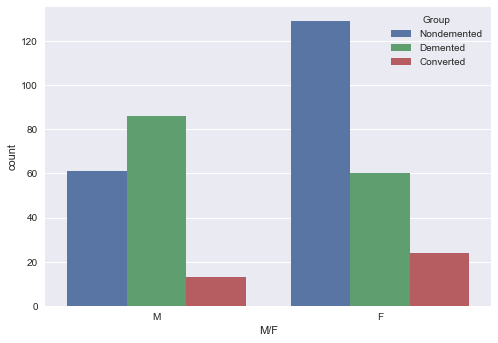

In [12]:
import seaborn as sns
sns.countplot(x='M/F', data = df, hue ='Group')

from the above countplot, it shows the males have more count of demented cases  than the females
while the female has more count of nondemented and converted

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Group', ylabel='count'>

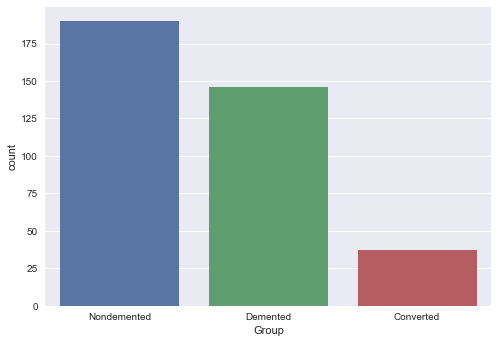

In [13]:
sns.countplot(df.Group)

This shows an unbalnced dataset with nondemented having a high number of count than the other categories. This should be looked into careful has it may cause a bias dueing model building


In [14]:
#Data Cleaning
df['Group'].replace('Demented',0,inplace=True)
df['Group'].replace('Nondemented',1,inplace=True)
df['Group'].replace('Converted',2,inplace=True)

In [15]:
df['Group'] = df['Group'].astype(int)

<AxesSubplot:>

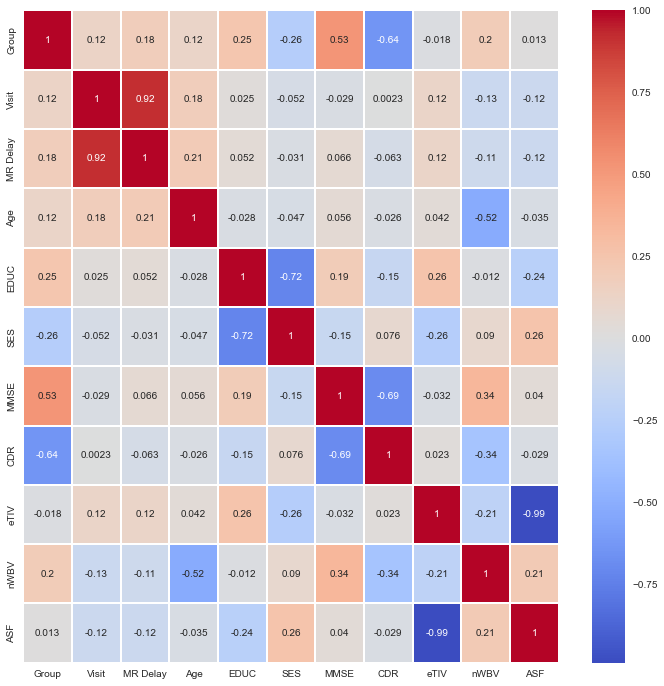

In [16]:
corr= df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

This correlation heatmap shows the correlation of features with each other. This will aid in selecting features to help in building a good model and improve its accuracy

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


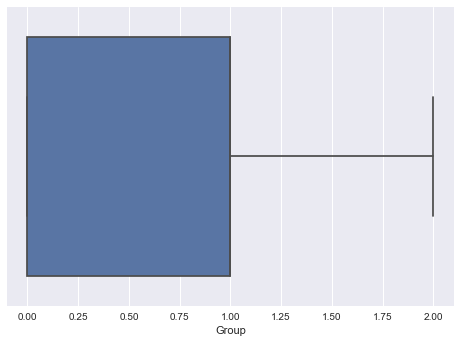

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


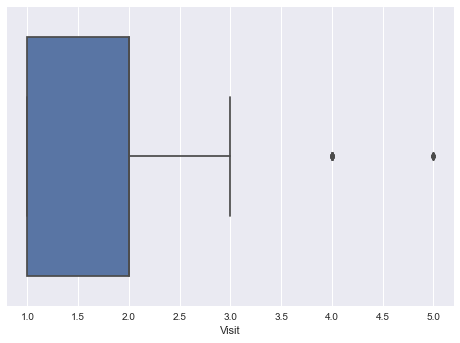

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


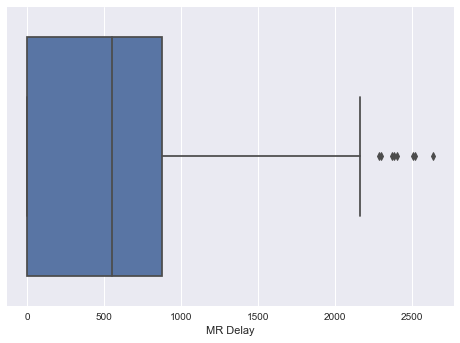

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


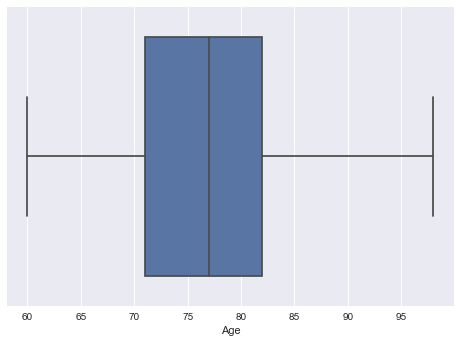

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


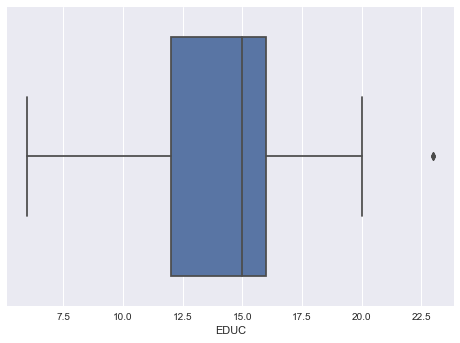

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


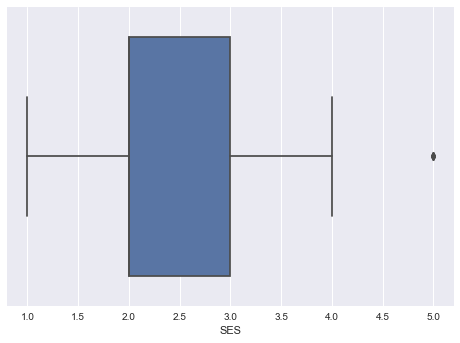

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


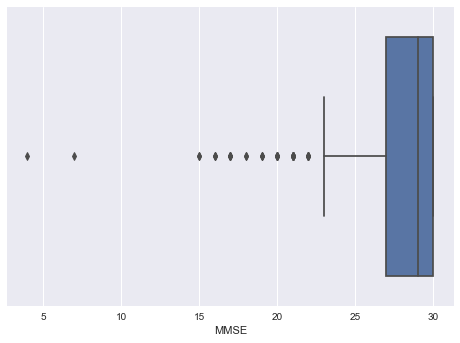

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


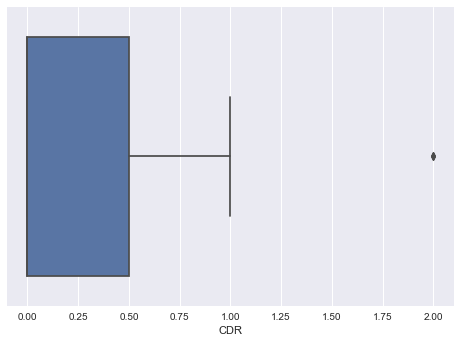

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


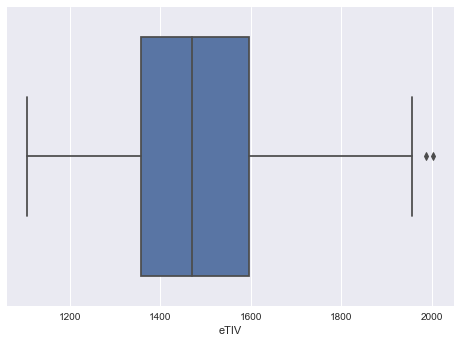

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


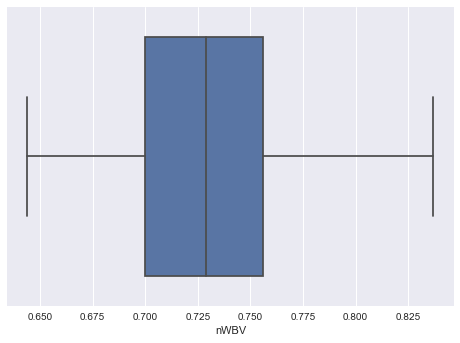

C:\Users\drogu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


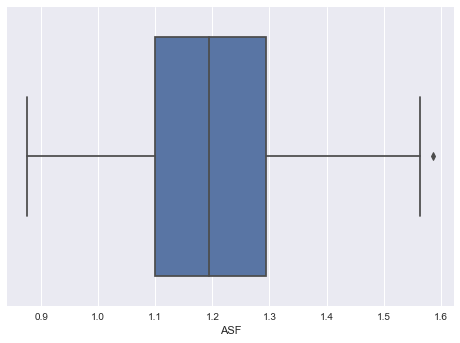

In [17]:
#Lets check for outliers for each numerical column..

colnames = [i for i in df.columns if df[i].dtypes !='O'] #List of all the numerical columns

for i in colnames:
    sns.boxplot(df[i])
    plt.show()

From the boxplot plotted, it can be seen that some features have outliers such as SES, EDUC, MR Delay, Visit, 